Theano- short Tutorial

In [1]:
import theano
from theano import tensor as T, function
import numpy as np

# Function Definition

In [14]:
X = T.matrix('x')
Y = X**2
Z = T.grad(Y.sum(),X)
F = function([X],[Y,Z])


In [15]:
x = np.array([[2,3],[4,2]])
y,z = F(x)

In [17]:
print x
print '-'*12
print y
print '*'*12
print z


[[2 3]
 [4 2]]
------------
[[  4.   9.]
 [ 16.   4.]]
************
[[ 4.  6.]
 [ 8.  4.]]


### Optimising a simple model

In [18]:
%matplotlib inline

In [19]:
np.random.seed(123)
import matplotlib.pyplot as plt
from IPython import display
import time

##### Simple Problem

In [56]:
noise_var = 0.5
n_samples = 1000
n = np.random.normal(0,noise_var,n_samples)
x = np.arange(n_samples)
x = (x-x.mean()) / x.std()
w,b = np.random.randn(2)

d = w*x + b 
y = d + n
w


1.0962567903390179

###### Visualise the data

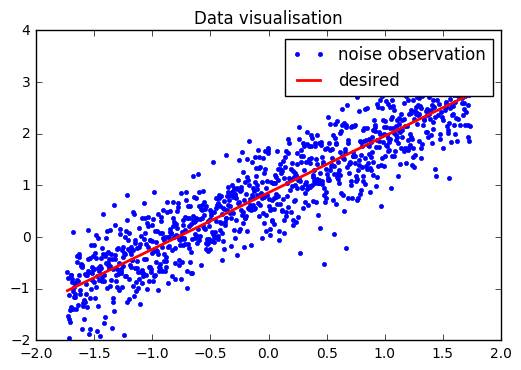

In [72]:
plt.plot(x,y,'.')
plt.plot(x,d,'-r',linewidth=2.0)
plt.legend(('noise observation','desired'))
plt.title('Data visualisation')

##### Theano model

In [73]:
X,Y = T.vectors('input','desired')
W = theano.shared(0.01)
B = theano.shared(0.)
Z = W*X + B
Cost = ((Y-Z)**2).mean()
params = [W,B]
w

1.0962567903390179

In [74]:
W.get_value()


array(0.01)

In [75]:
updates = ((W,W*2),)
double_w = function([],[],updates=updates)


In [76]:
double_w()
W.get_value()


array(0.02)

#### Training the Model

In [77]:
#cost = (d-y)**2
#updates:
#w = w - lr*grad(cost,w) = w + lr*2*(d-y)*x
#b = b - lr*grad(cost,b) = b + lr*2*(d-y)

lr = 0.1
grads = [T.grad(Cost, p) for p in params]
updates = [(p,p-lr*g) for p,g in zip(params, grads)]
print updates

[(<TensorType(float64, scalar)>, Elemwise{sub,no_inplace}.0), (<TensorType(float64, scalar)>, Elemwise{sub,no_inplace}.0)]


In [78]:
train = function([X,Y], Cost, updates = updates)
b

0.86103685444633138

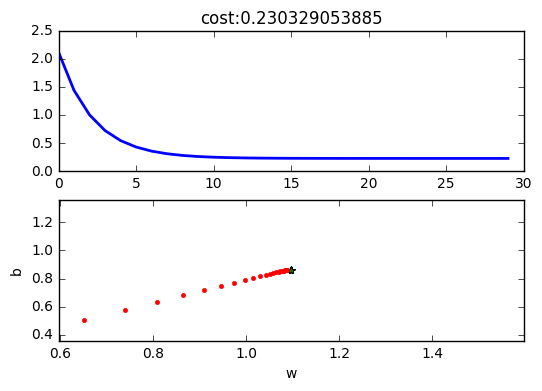

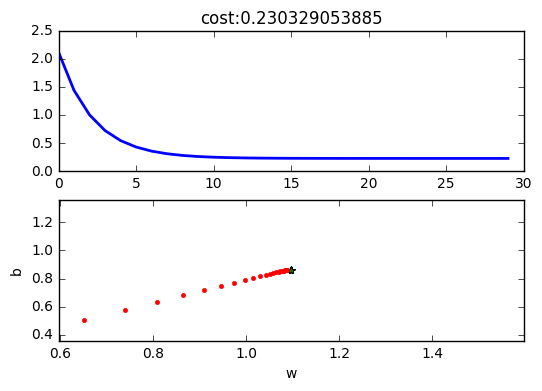

In [79]:
epochs = 30
final_cost = []
for i in range(epochs):
    final_cost.append(train(x,y))
    what,bhat = W.get_value(),B.get_value()
    #cost function
    plt.subplot(211)
    plt.cla()
    plt.title('cost:{}'.format(final_cost[-1]))
    plt.plot(final_cost,linewidth=2.0)
    
    #parameter space
    plt.subplot(212)
    plt.plot(w,b, '*',linewidth=2.)
    plt.plot(what,bhat,'.r',linewidth=2.)
    plt.xlim(w-0.5,w+0.5)
    plt.ylim(b-0.5,b+0.5)
    plt.xlabel('w')
    plt.ylabel('b')
    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(1.0)

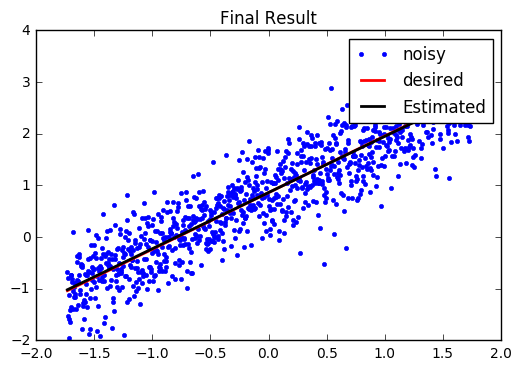

In [80]:
plt.title('Final Result')
plt.plot(x,y,'.')
plt.plot(x,d,'r',linewidth=2.)
plt.plot(x,what*x+bhat,'k',linewidth=2.0)
plt.legend(('noisy','desired','Estimated'))